# APLICAÇÃO DO MODELO DE LIBERAÇÃO FINITA DE CALOR PARA O MOTOR HONDA CG 150 TITAN

In [3]:
import math as m
import numpy as np
import matplotlib.pyplot as plot

In [4]:
#dados
theta_d =m.radians(30) #duração da combustão
theta_s =m.radians(-8) #início da fagulha da vela
a = 5 #parâmetro de Weib
n = 3 #parâmetro de Weib
T_i = 300 #tempeatura inicial
P_i = 101325 #pressão inicial
M = 29 
s = 57.8 #curso do pistão
b = 57.3 #diâmetro do cilíndro 
l = 96 #comprimento da biela
r = 9.5 #taxa de compressão
gamma = 1.4 #razão de calores específicos 

In [52]:
g = -1.2*y + 7*m.exp(-0.3*x) #EDO para teste do modelo rk4


#método de runge-kutta
def rk4(a,b,h,y0,g):
    x = []
    for i in np.arange(a,b,h):
        x.append(i)
        n = len(x)
        for i in np.arange(1,n-1):
            if i==1:
                j = y0
            else:
                j = i
            k1 = g(i, j)
            k2 = g(i + (h/2),j + k1*(h/2))
            k3 = g(i + (h/2),j + k2*(h/2))
            k4 = g(i + h,j + k3*h)
            k = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            return 





In [6]:
h=0.5
i=0
j=3
k1 = g(i, j)
k2 = g(i + (h/2),j + k1*(h/2))
k3 = g(i + (h/2),j + k2*(h/2))
k4 = g(i + h,j + k3*h)
k = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
print(k1)
print(k2)
print(k3)
print(k4)
print(k)
print(h/2)



3.4000000000000004
1.8742044042998698
2.331943083009909
1.0257899851694594
2.139680826631503
0.25


# Módelo de liberação finita de calor

    No modelo de liberação finita de calor tem-se que: a fração de liberação de calor, em função do ângulo do vira brequim, para um ciclo Otto, é dada por:
    
<img src="eqmod1.JPG">

    Onde theta_s e theta_d representam o ângulo de início da combustão e o ângulo de duração da combustão, respecivamente(tais dados são encontrados no manual de serviço do veículo cujo o motor de estudo pertence).
    A derivada de tal função em theta representa, do ponto de vista físico, a taxa de variação da queima de combustível, amesma é dada por:
    
<img src="eqmod2.JPG">

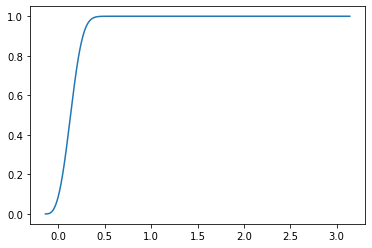

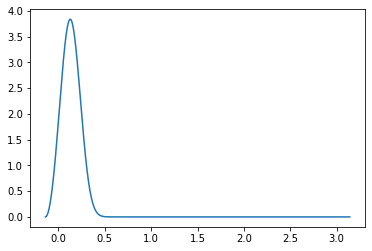

In [33]:
theta = np.linspace(m.radians(-8),m.radians(180),1000)
def eq1(a,b,c,d,e): #equação da fração de liberação de calor
    return 1 - m.e**(-a*((b - c)/d)**e) #a = a; b = theta;c = theta_s;d = theta_d; e = n
def eq2(a,b,c,d,e): #derivada da equação anterior
    return ((a*e)/d)*((b - c)/d)**(e-1)*m.e**(-a*((b-c)/d)**e) #a = a; b = theta;c = theta_s;d = theta_d; e = n

xcb = eq1(a,theta,theta_s,theta_d,n)
xcb_ponto = eq2(a,theta,theta_s,theta_d,n)
plot.figure()
plot.plot(theta,xcb)
plot.show()
plot.figure()
plot.plot(theta,xcb_ponto)
plot.show()



# A química da combustão 

    Uma equação de combustão padrão é dada pela seguinte fórmula química:
    
<img src="eqquim.JPG">
    
    Para o caso da combustão da gasolina C8H18, tem-se que:
        x = 8
        y = 18
        z = d = 0

In [8]:
x = 8
y = 18
z = 0
d = z

n1 = x #coeficiente estequiométrico referente ao dioxido de carbono 
n2 = y/2 #coeficiente estequiométrico referente ao vapor d`água
alpha = a + (y/4) - (z/2) #coeficiente estequiométrico referente ao ar
n3 = (d + 2*3.76*alpha)/2 #coeficiente estequiométrico referente ao gás nitrogenio








    A razão ar/combustível pode, então, ser determinada conhecendo o número de mols da mistura e a massa molar dos elementos químicos, disponíveis na tabela periódica.

<img src="eqquim2.JPG">

    A tabela periódica é então exibida a seguir:
   
<img src="tabper.JPG">

In [13]:
M_C = 12 #massa molar em kg/mol
M_O = 16 #massa molar em kg/mol
M_H = 1 #massa molar em kg/mol
M_N = 14 #massa molar em kg/mol

M_ar = (2*M_O + 3.76*M_N)

AC_s = alpha*M_ar/(x*M_C + y*M_H)


    A massa de ar estequiométrico é dada considerando-se o mesmo como gás ideal, mediante a equação dos gases perfeitos
    
<img src="eqquim3.JPG">

    Onde Ru é a constante universal dos gases, para o ar assume o valor de 8.31 J/mol*K. O volume da equação é o volume do cilíndro no PMI, onde todas as variáveis são conhecidas, o mesmo é dado pelo produto da área da base do pistão pelo curso do motor

In [15]:
V_1 = (m.pi*b**2*s)/4
Ru = 8.31
m_ars = (P_i*V_1*M_ar)/(Ru*T_i)


    Com o conhecimento da massa de ar estequiométrica, determinas-se a massa de combustível estequiométrica por:

<img src="eqquim4.JPG">

    O coeficiente de perda de carga deve ser considerado para o cálculo da massa de ar real, esse coeficiente depende do curso da válvula de admissão e do diâmetro da mesma, e é dado por:
    
<img src="eqquim5.JPG">

    Finalmente, determina-se a massa de combustível real por:
    
<img src="eqquim6.JPG">

In [16]:
m_cis = m_ars/AC_s
S_v = 0.015 #valor igual ao do professor, serve apenas para rodar o modelo -> BUSCAR O REAL PARA O CG
D_v = 0.042 #valor igual ao do professor, serve apenas para rodar o modelo -> BUSCAR O REAL PARA O CG
Cd = 1 - 1.5*(S_v/D_v)
m_arr = m_ars*Cd

    A razão de equivalência é uma medida da qualidade da combustão, caso a mesma seja menor que 1 tem-se uma combustão com excesso de ar, ou seja, uma mistura pobre, igual a 1 tem se uma mistura ideal, do ponto de vista químico, chamada de estequiométrica, se menor que 1 tem se uma mistura rica, com excesso de combustível. Tal razão é determinada por:
    
<img src="eqquim7.JPG">

    Pode se expressar a razão ar/combustível por:
    
<img src="eqquim8.JPG">

    Por fim, determina-se a massa real de combustível por meio de:

<img src="eqquim9.JPG">

In [17]:
phi = 1.1
AC_r = (AC_s)/phi
m_cir = (phi*m_arr)/AC_s

# A quantidade de calor inserido na combustão

    A fração de energia térmica disponível no cilíndro em função da posição angular da manivela é definida por:
    
<img src="eqcombust1.JPG">

    Seu uso depende do poder calorífico do combustível. Para Martins(2012) o mesmo é de 42500 MJ/kg. Considera-se também a eficiência do motor de 33%, ou seja 0,33

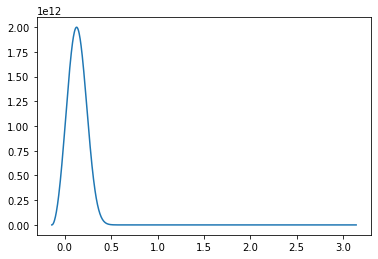

In [18]:
PCI = 42500
neta_c = 0.33
def eq3(a,b,c,d):
    return a*b*c*d #onde a=mci_r,b=PCI,d= a derivada da liberação de calor, d= eficiencia 

Qcb_ponto = eq3(m_cir,PCI,xcb_ponto,neta_c)

plot.figure()
plot.plot(theta,Qcb_ponto)
plot.show()


# Volume em relação a theta 

    O volume do pistão, em relação ao virabrequim é dado por:
    
<img src="eqvar1.JPG">

    em que:
        Vd é o volume deslocado no interior do cilíndro
        R= (2*l)/s 
        r é a taxa de compressão
    
    A derivada da equação acima é dada por:
    
<img src="eq7.JPG">

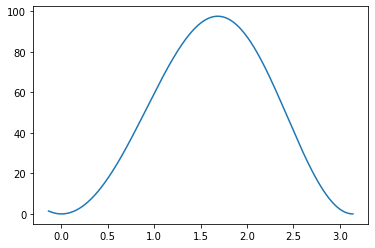

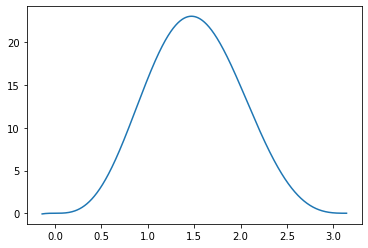

In [47]:
Vd = ((m.pi*b**2)/4)*s
R= (2*l)/s 

def Volume(a,b,c,d):
    return (a/(b-1)) + (a/2)*(c + 1 - np.cos(d) - (c**2 - np.sin(d)**2)**(-0.5))

V_theta = Volume(Vd,r,R,theta)

def D_Volume(a,b,c,d):
    return (a/2)*np.sin(d)*(1 + np.cos(d)*(R**2 - np.sin(d)**2)**(-0.5))

dV_theta = D_Volume(Vd,r,R,theta)

plot.figure()
plot.plot(theta,V_theta)
plot.show()

plot.figure()
plot.plot(theta,dV_theta)
plot.show()

# Pressão em relação a theta 

    A equação da taxa de variação de pressão em relação a theta é dada por:
  
<img src="eq8.JPG">

    A referida equação trás a concepção de que a razão dos calores específicos é constante, o que, realmente, não é verdade. No entanto, um modelo mais realista exigiria cosniderar efeitos químicos da combustão que estão aquem do que um estudante de graduação ver em sala, no entanto fica como sugestão para futuros membros perderem a cabeça desenrrolando essa parada aí.

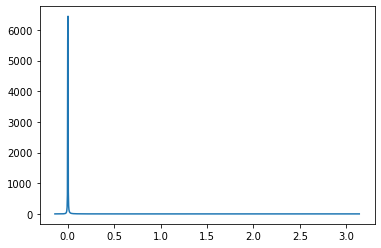

In [49]:
dP_theta = -gamma*(1/Vd)*dV_theta + ((gamma-1)/Vd)*xcb_ponto

plot.figure()
plot.plot(theta,dP_theta)
plot.show()

In [53]:
P = rk4(-180,theta,0.1,1,dP_theta)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()